In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('sales_data_sample.csv', encoding='iso-8859-1')

In [3]:
df.shape

(2823, 25)

In [4]:
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [5]:
df.isnull().sum()

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

In [6]:
# Select the relevant features for clustering
selected_features = ['QUANTITYORDERED', 'PRICEEACH', 'SALES']
X = df[selected_features]

In [7]:
from sklearn.cluster import KMeans

In [8]:
import warnings
warnings.filterwarnings("ignore")

In [9]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

In [10]:
import matplotlib.pyplot as plt

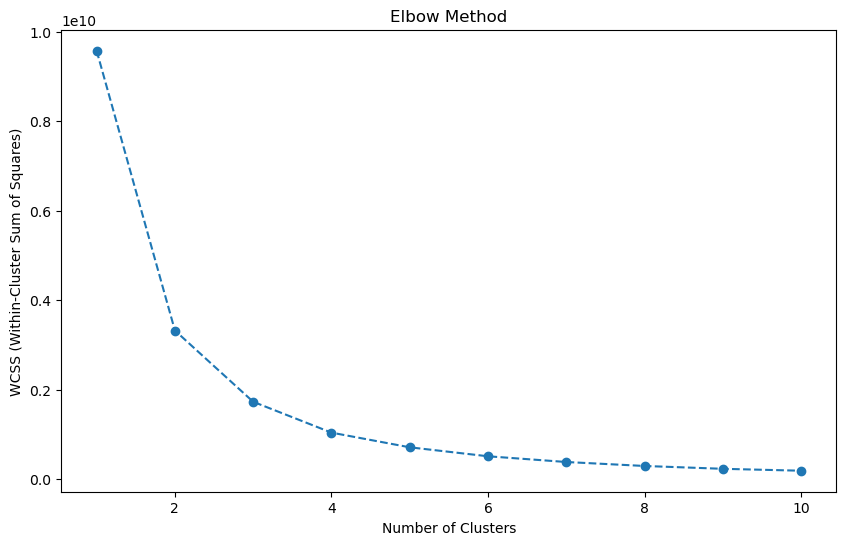

In [15]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.show()

In [12]:
optimal_num_clusters = 3

In [13]:
kmeans = KMeans(n_clusters=optimal_num_clusters, init='k-means++', random_state=42)
X.loc[:, 'cluster'] = kmeans.fit_predict(X)

In [14]:
X

,QUANTITYORDERED,PRICEEACH,SALES,cluster
0,30,95.70,2871.00,1
1,34,81.35,2765.90,1
2,41,94.74,3884.34,0
3,45,83.26,3746.70,0
4,49,100.00,5205.27,0
...,...,...,...,...
2818,20,100.00,2244.40,1
2819,29,100.00,3978.51,0
2820,43,100.00,5417.57,0
2821,34,62.24,2116.16,1
